Horacio Flores

# Resources

## Support Vector Machine (SVM)
* https://towardsdatascience.com/support-vector-machines-svm-c9ef22815589

## Guide on Support Vector Machine (SVM) Algorithm
* https://www.analyticsvidhya.com/blog/2021/10/support-vector-machinessvm-a-complete-guide-for-beginners/

## Support Vector Machines (SVM): An Intuitive Explanation
* https://medium.com/low-code-for-advanced-data-science/support-vector-machines-svm-an-intuitive-explanation-b084d6238106#:~:text=They%20are%20widely%20used%20in,data%20points%20into%20different%20classes.

## plot_decision_regions: Visualize the decision regions of a classifier
* https://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/


## Desmos
* https://www.desmos.com/


---
# **Introduction To Machine Learning**
##**Supervised Learning (= classification):**

*   k-Nearest Neighbor (kNN)
*   naive Bayesian (NB)
*   Decision Tree (DT)
*   **Support Vector Machine (SVM)**
---

In Support Vector Machine we separate a data point into class attribute using hyperplane to separate our data.

In this technique, we lot each data item as a point in n-dimensional space(where n is the number of features you have) with the value of a particular coordinate. Then we perform classification by finding the hyperplane that differentiates the two classes very well.


## <font color = #950CDF> Part 1: </font> <font color = #4854E8> Information of Dataset </font>

<b>Diabetes Dataset:</b> This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.
<b> Attribute Information </b> <br>
`Pregnancies:` Number of times pregnant <br>
`Glucose:` Plasma glucose concentration a 2 hours in an oral glucose tolerance test <br>
`BloodPressure:` Diastolic blood pressure (mm Hg) <br>
`SkinThickness:` Triceps skin fold thickness (mm) <br>
`Insulin:` 2-Hour serum insulin (mu U/ml) <br>
`BMI:` Body mass index (weight in kg/(height in m)^2) <br>
`DiabetesPedigreeFunction:` Diabetes pedigree function <br>
`Age:` Age (years) <br>
`Outcome:` Class variable (0 or 1) <br>

https://www.kaggle.com/datasets/mathchi/diabetes-data-set

### <font color = #27C3E5> 1.1: </font> <font color = #41EA46> Import Libraries and Dataset </font>

#### <font color = blue> Import the Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import minimize, fmin_tnc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter

#### <font color = blue>Import the Dataset

In [3]:
df = pd.read_csv("diabetes.csv")
df.head(3)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1

### <font color = #27C3E5> 1.2: </font> <font color = #41EA46> Data Summary and Visualization </font>

#### <font color = blue>Data shape

In [4]:
print("Number of columns:", df.shape[1])
print("Number of rows: ", df.shape[0])

Number of columns: 9
Number of rows:  768


#### <font color = blue>Data Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


#### <font color = blue>Data Description

In [6]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

#### <font color = blue> Visualize the Label Class

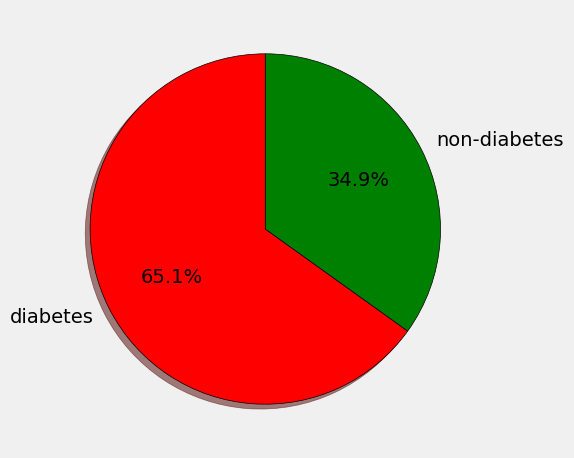

In [7]:
plt.style.use('fivethirtyeight')
diabetes = df[df['Outcome'] == 0].shape[0]
non_diabetes = df[df['Outcome'] == 1].shape[0]

label = [diabetes, non_diabetes]
plt.pie(label, labels = ['diabetes', 'non-diabetes'], shadow = True, wedgeprops = {'edgecolor': 'black'},
        autopct = '%4.1f%%', startangle = 90, colors = ['red', 'green'])
plt.tight_layout()
plt.show()

#### <font color = blue> Realtionship of Features

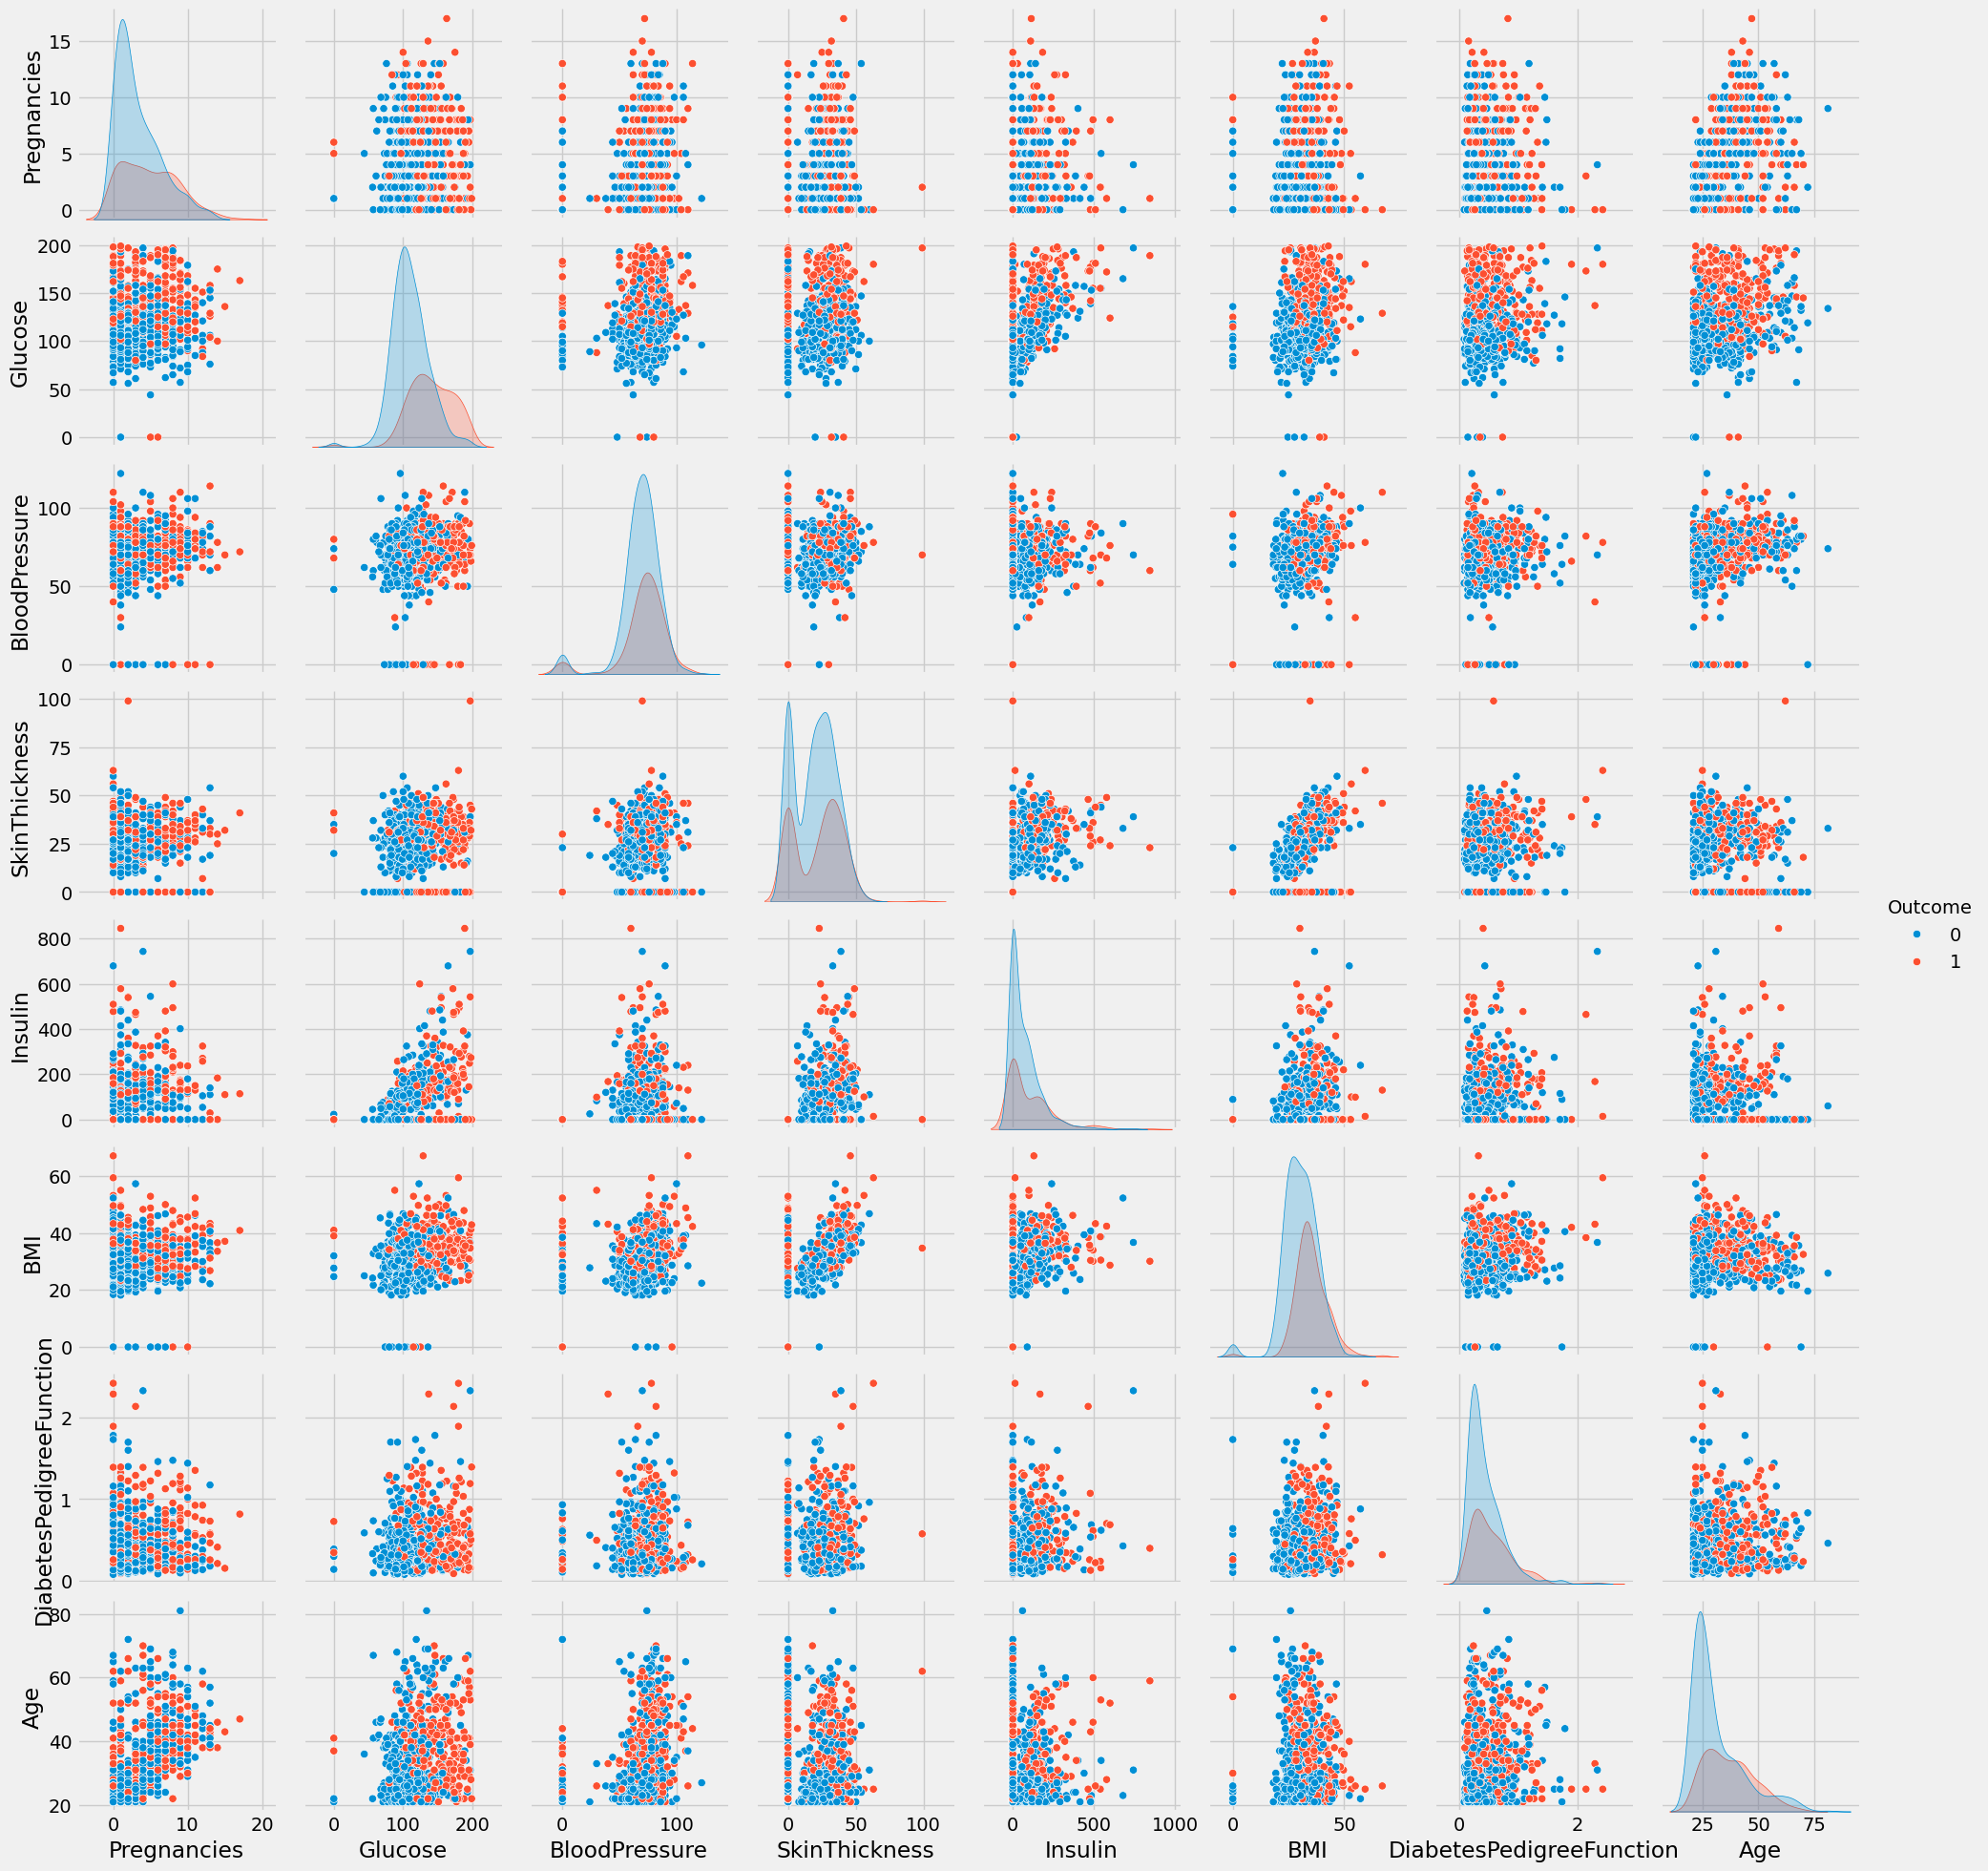

In [8]:
sns.pairplot(df, hue = 'Outcome')  # blue = diabetes, red = non-diabetes class

#### <font color = blue> Check the Correaltion of Features

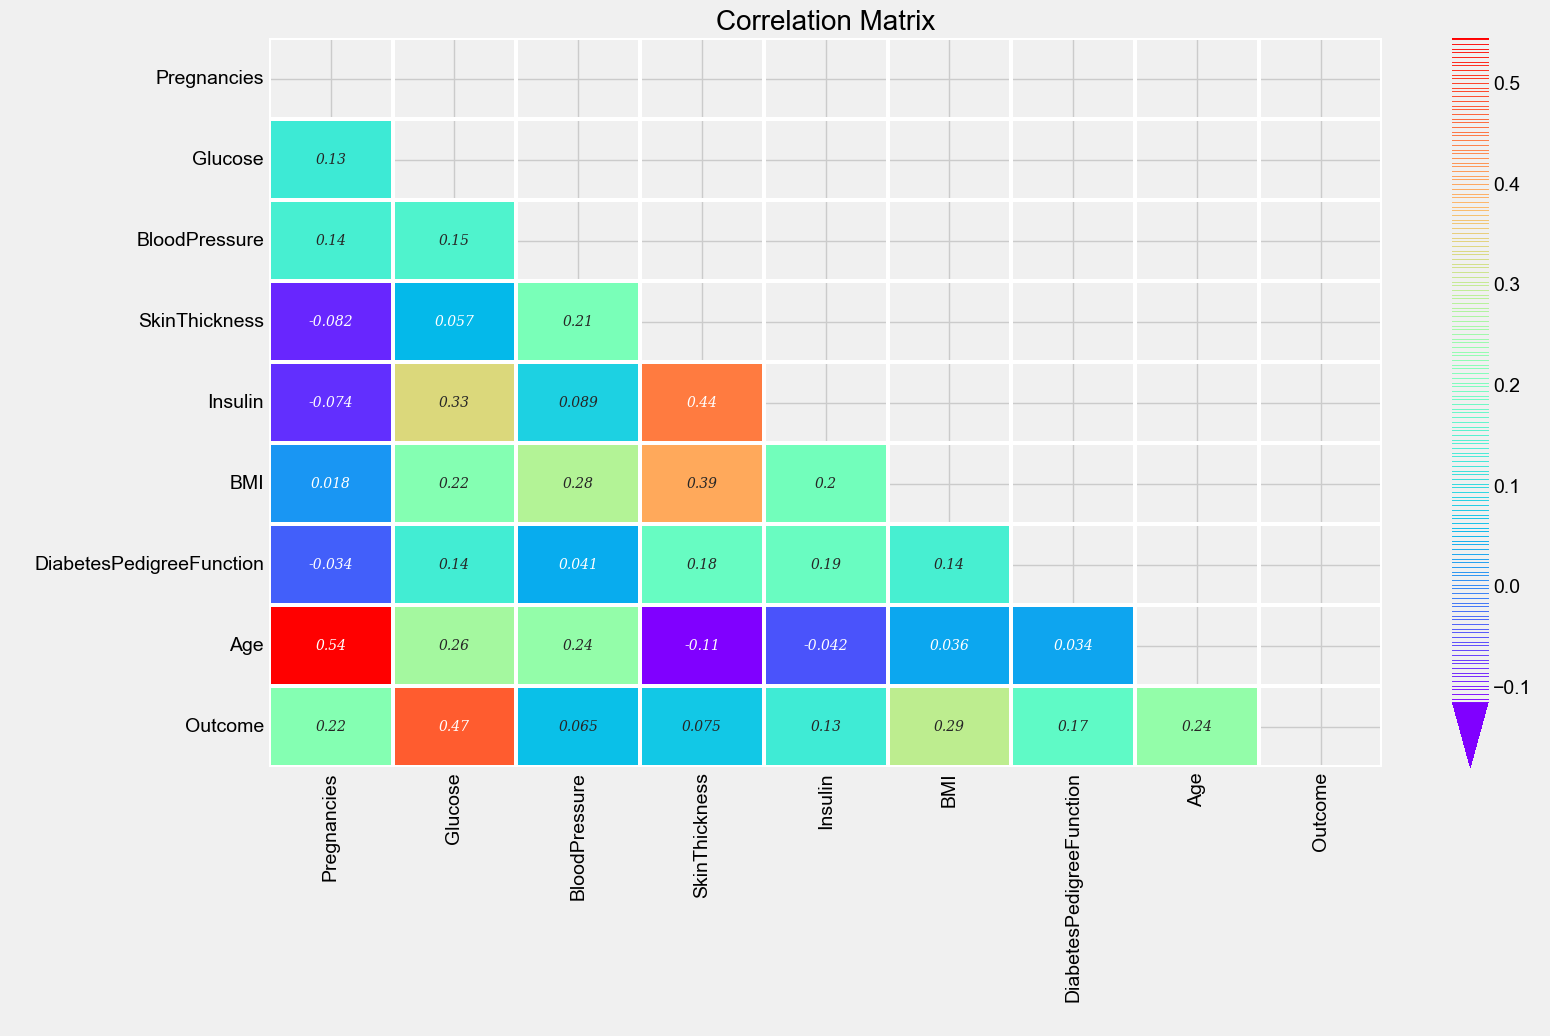

In [9]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

## <font color = #950CDF> Part 2: </font> <font color = #4854E8> Data Preprocessing </font>

### <font color = #27C3E5> 2.1: </font> <font color = #41EA46> Define Predictor and target Attribute </font>

In [10]:
X = df.iloc[:, :-1]
Y = df.iloc[:, -1]

#### <font color = blue> Predictor Attribute

In [11]:
X.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

#### <font color = blue> Target Attribute

In [12]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

### <font color = #27C3E5> 2.2: </font> <font color = #41EA46> Dealing with Missing Value </font>

#### <font color = blue> Check the Missing Value

In [13]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### <font color = #27C3E5> 2.3: </font> <font color = #41EA46> Feature Scaling </font>

#### <font color = blue> Apply Standard Scaler

In [14]:
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

#### <font color = blue> After apply Standard Scaler

In [15]:
pd.DataFrame(X).head()

0         1         2         3         4         5         6  \
0  0.639947  0.848324  0.149641  0.907270 -0.692891  0.204013  0.468492   
1 -0.844885 -1.123396 -0.160546  0.530902 -0.692891 -0.684422 -0.365061   
2  1.233880  1.943724 -0.263941 -1.288212 -0.692891 -1.103255  0.604397   
3 -0.844885 -0.998208 -0.160546  0.154533  0.123302 -0.494043 -0.920763   
4 -1.141852  0.504055 -1.504687  0.907270  0.765836  1.409746  5.484909   

          7  
0  1.425995  
1 -0.190672  
2 -0.105584  
3 -1.041549  
4 -0.020496

### <font color = #27C3E5> 2.4: </font> <font color = #41EA46> Split the Data into Train and Test </font>

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

#### <font color = blue> Training Data

In [17]:
print("X_test", X_train.shape)
print("X_test", y_train.shape)

X_test (614, 8)
X_test (614,)


#### <font color = blue> Testing Data

In [18]:
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (154, 8)
X_test (154,)


## <font color = #950CDF> Part 4: </font> <font color = #4854E8> Build Support Vector Machine  </font>
In this part, we build Support Vector Machine Classification Model using Scikit-Learn

#### <font color = blue> Import Model from Sklearn

In [19]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit
from sklearn.decomposition import PCA



#### <font color = blue> Initialize the Model & Finding the Best Parameters

In [20]:
C_range = [0.01, .1, 1, 10]
gamma_range = [0.01, .1, 1, 10]
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None),
             estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1, 10]})

In [21]:
classifiers =  []

pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)

for C in C_range:
    for gamma in gamma_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_train, y_train)
        classifiers.append((C, gamma, clf))

#### <font color = blue> Visualization

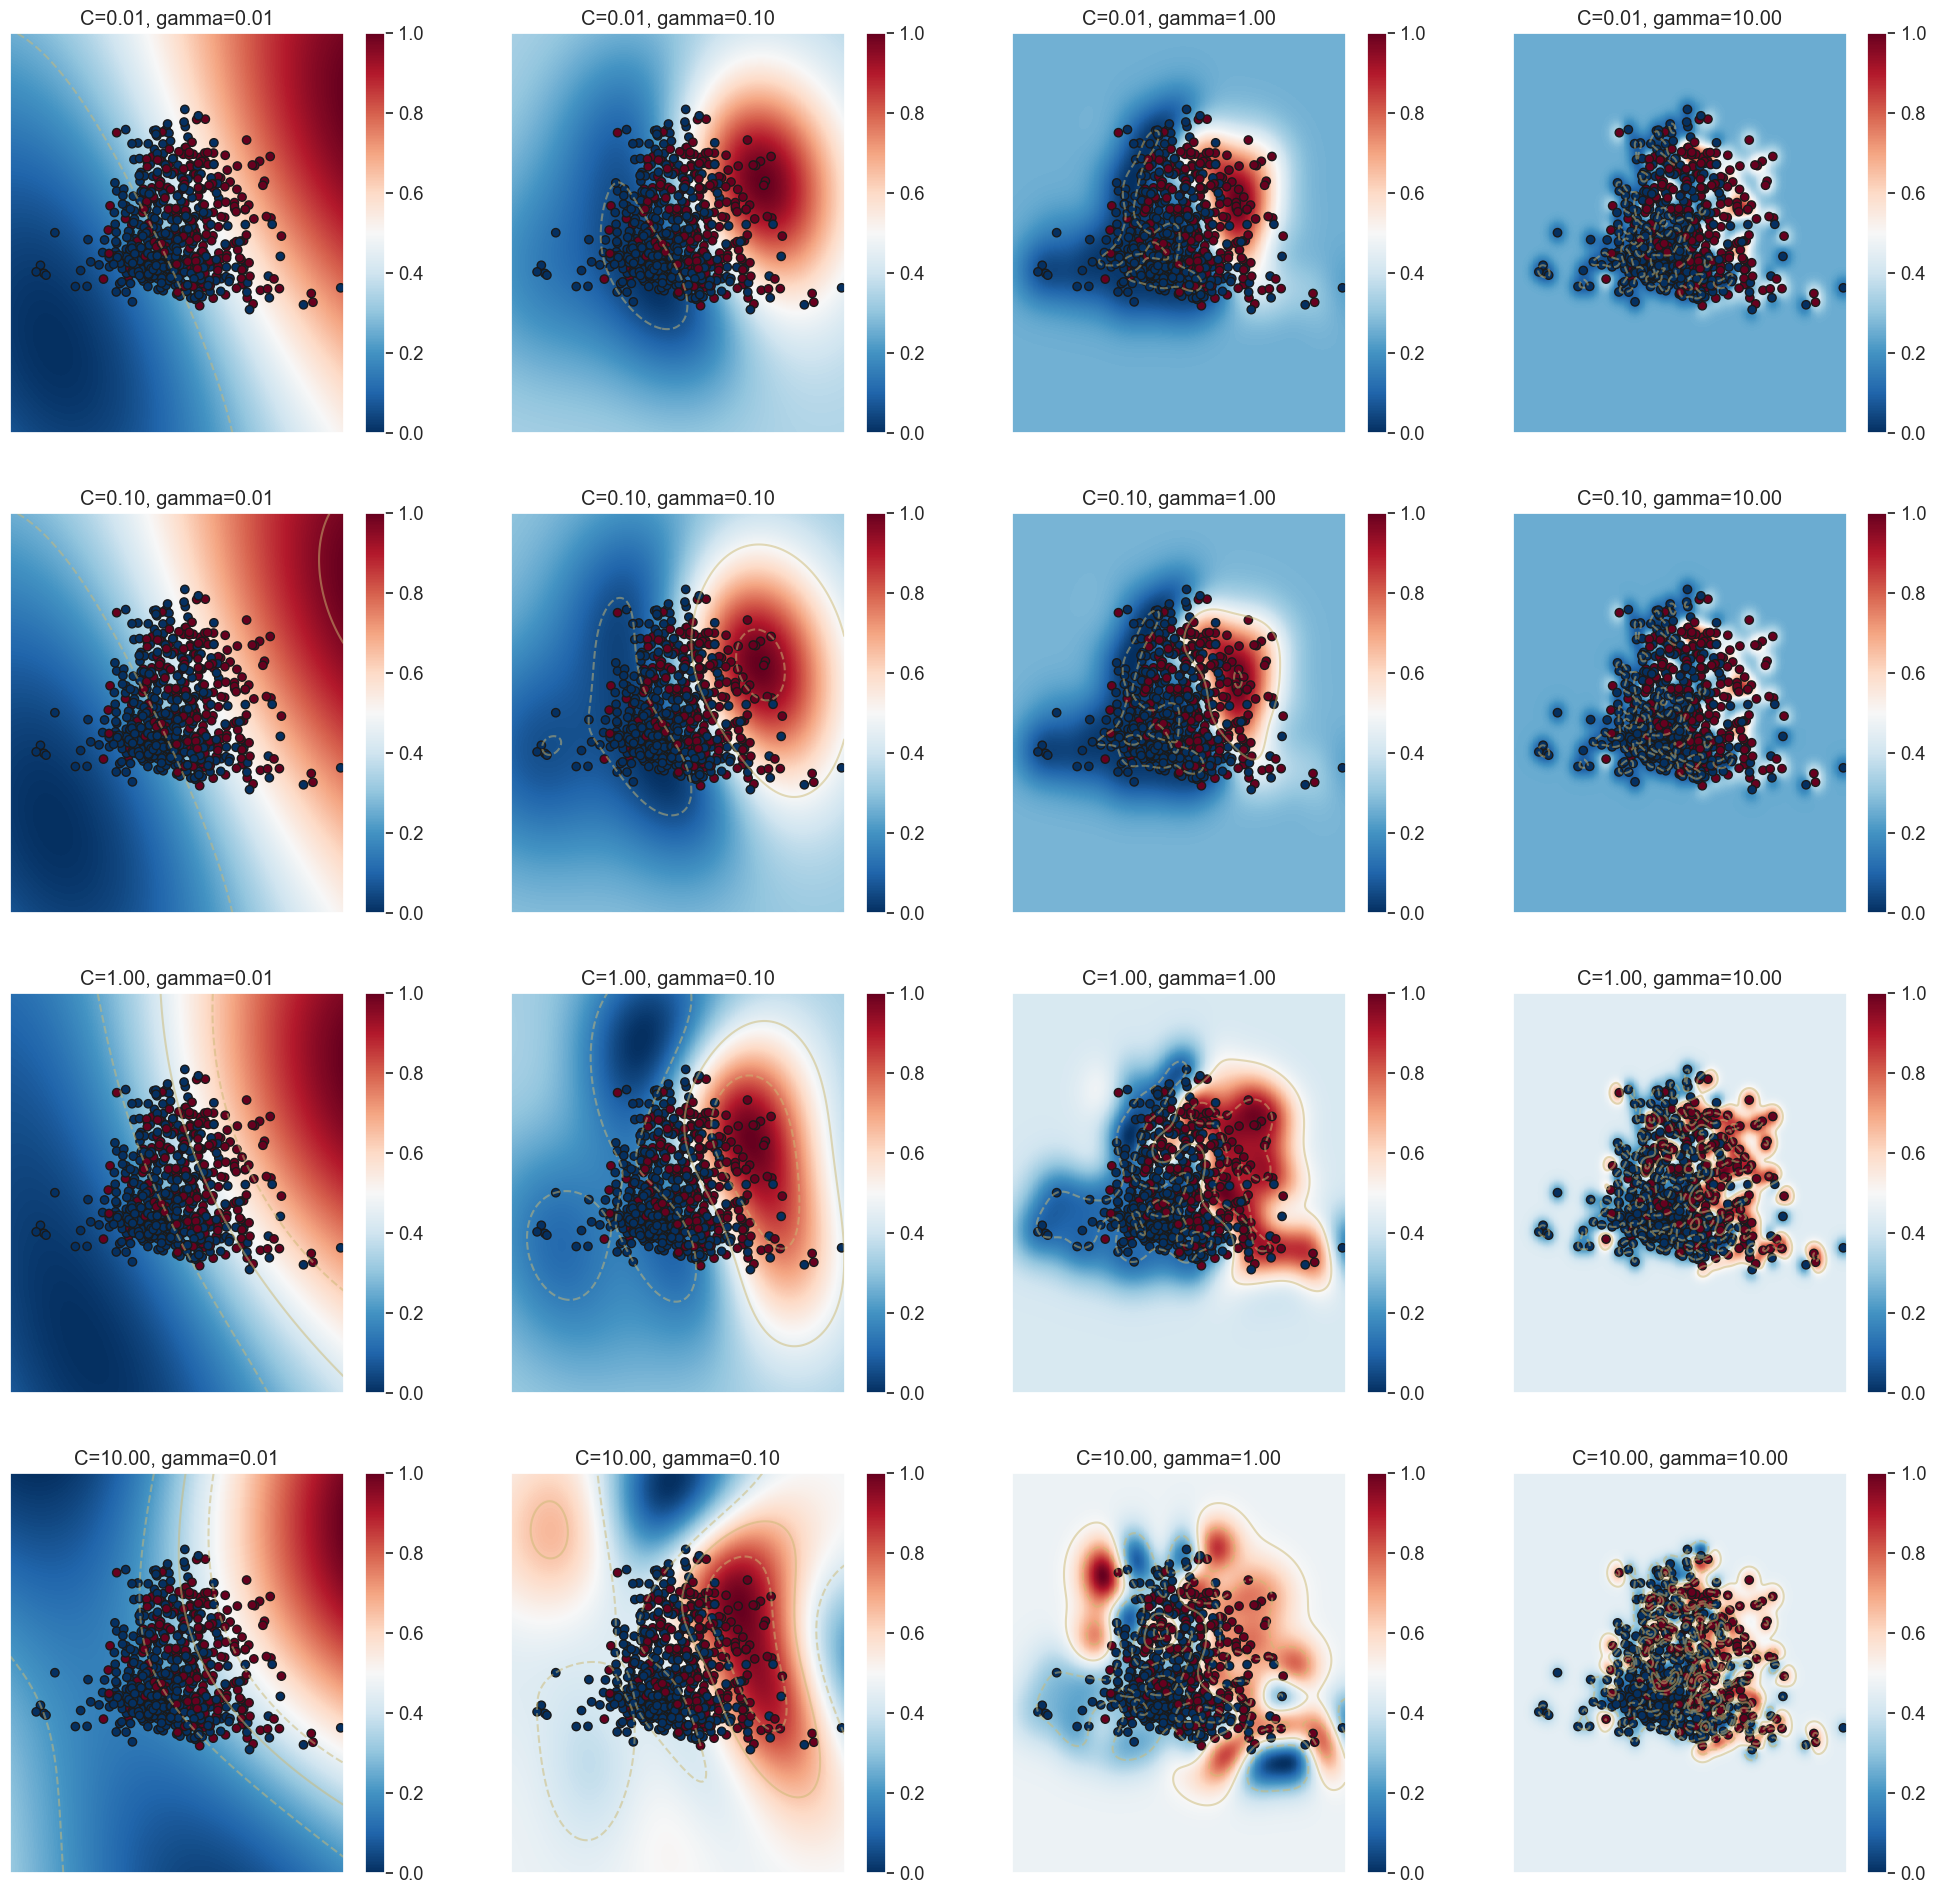

The best parameters are {'C': 10, 'gamma': 0.01} with a score of 0.77


In [22]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 20))
xx, yy = np.meshgrid(np.linspace(-6, 6, 400), np.linspace(-6, 6, 400))
for k, (C, gamma, clf) in enumerate(classifiers):
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(len(C_range), len(gamma_range), k + 1, aspect='equal')
    plt.title("C=%.2f, gamma=%.2f" % ((C),(gamma)),
              size='medium')
    

    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.contour(xx, yy, Z, colors='y', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu_r,
                edgecolors='k')

    plt.subplots_adjust(left=0.02, right=0.98, bottom=0.04, top=0.96)
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')
    plt.colorbar()
    
plt.show()
print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))


Although every margin seems "funky", out of all of them, when C = 10 and gamma = 0.01 the margin is at its narrowest. Meaning there is less room for error and the decision boundary is closest to the data.